In [ ]:
!pip install konlpy

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
찾은 파일들: ['/content/drive/MyDrive/Colab Notebooks/db 네이버 종토실 크롤링/MSFT_1year.xlsx', '/content/drive/MyDrive/Colab Notebooks/db 네이버 종토실 크롤링/WMT_1year.xlsx', '/content/drive/MyDrive/Colab Notebooks/db 네이버 종토실 크롤링/AMZN_1year.xlsx', '/content/drive/MyDrive/Colab Notebooks/db 네이버 종토실 크롤링/GOOG_1year.xlsx', '/content/drive/MyDrive/Colab Notebooks/db 네이버 종토실 크롤링/META_1year.xlsx', '/content/drive/MyDrive/Colab Notebooks/db 네이버 종토실 크롤링/TSLA_1year.xlsx', '/content/drive/MyDrive/Colab Notebooks/db 네이버 종토실 크롤링/AAPL_1year.xlsx', '/content/drive/MyDrive/Colab Notebooks/db 네이버 종토실 크롤링/AVGO_1year.xlsx', '/content/drive/MyDrive/Colab Notebooks/db 네이버 종토실 크롤링/NFLX_1year.xlsx', '/content/drive/MyDrive/Colab Notebooks/db 네이버 종토실 크롤링/BRK.A_1year.xlsx']
데이터 샘플:
         date                                       comment    종목
0  2025.01.31                             혼자 개잡주 무빙 괜히 들어왔

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


감정 분석 결과 샘플:
                                        comment  advanced_sentiment
0                             혼자 개잡주 무빙 괜히 들어왔네            0.001864
1                     어제 어닝 잘나와봤자 뭐하냐고 맨날 조정질이네            0.002576
2                                      ㅆㅅㅅㅅ ㅣ 벌            0.363822
3  이거 할바에 그냥 qqq 테슬라 실적망이라도 머스크 트럼프 오른팔이라 폭등하네요            0.076464
4                                단기채권수익보다 낮음 ㅋㅋ            0.029444


<ipython-input-5-b79832c393dd>:95: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = data.groupby('종목').resample('M')['advanced_sentiment'].mean().reset_index()
<ipython-input-5-b79832c393dd>:103: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_range = pd.date_range(start=stock_data.index.min(), end=stock_data.index.max(), freq='M')
<ipython-input-5-b79832c393dd>:103: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_range = pd.date_range(start=stock_data.index.min(), end=stock_data.index.max(), freq='M')
<ipython-input-5-b79832c393dd>:103: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_range = pd.date_range(start=stock_data.index.min(), end=stock_data.index.max(), freq='M')
<ipython-input-5-b79832c393dd>:103: FutureWarning: 'M' is deprecated and

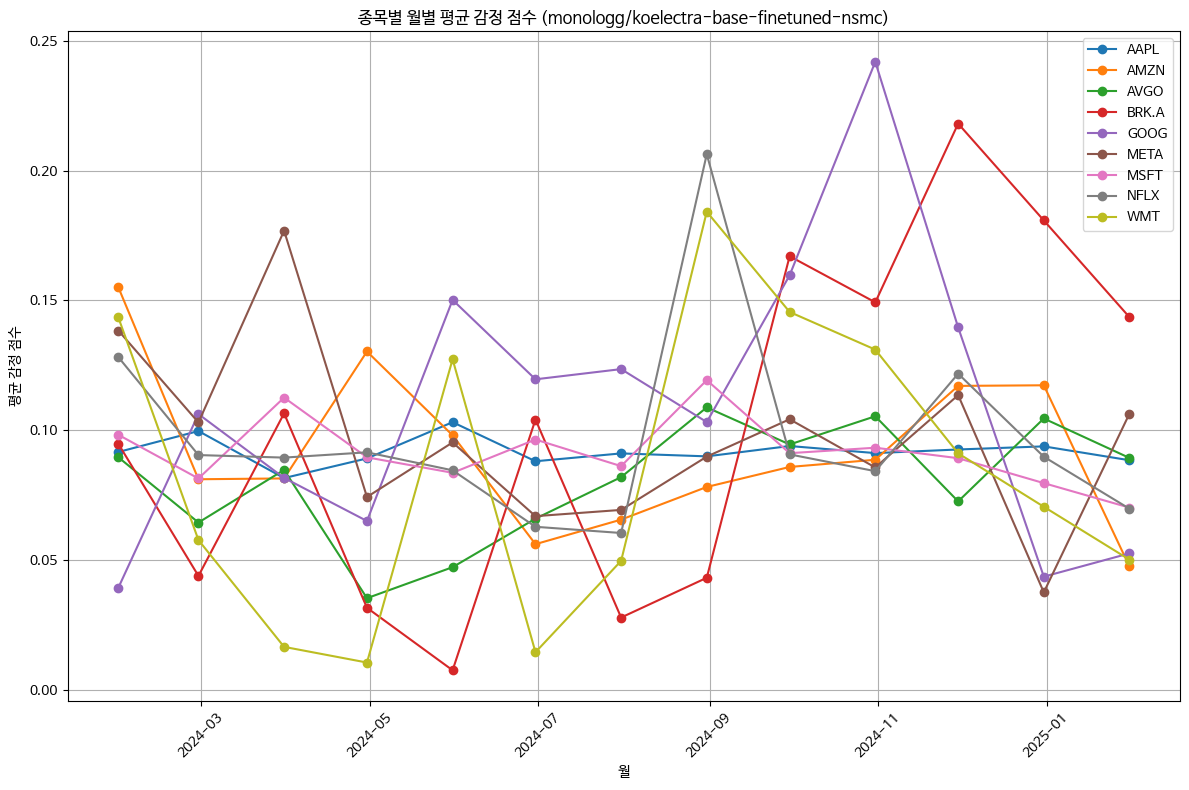

In [ ]:
import pandas as pd
import glob
import os
import re
import matplotlib.pyplot as plt
from google.colab import drive
from konlpy.tag import Okt
from transformers import pipeline

# 1. 구글 드라이브 마운트
drive.mount('/content/drive')

# 2. 모든 엑셀 파일 불러오기 (경로는 실제 폴더 구조에 맞게 수정)
file_path = '/content/drive/MyDrive/Colab Notebooks/db 네이버 종토실 크롤링/*.xlsx'
files = glob.glob(file_path)
print("찾은 파일들:", files)

# 3. 각 파일에서 데이터 읽어오고, 파일명에서 종목 티커를 추출하여 '종목' 컬럼 추가
df_list = []
for file in files:
    ticker = os.path.basename(file).split('_')[0]  # 예: "MSFT", "META", "BRK.A" 등
    df = pd.read_excel(file)
    df['종목'] = ticker
    df_list.append(df)
data = pd.concat(df_list, ignore_index=True)
print("데이터 샘플:")
print(data.head())

# 4. 텍스트 클리닝 함수: 개행 문자 제거 및 한글과 공백만 남기기
def clean_text(text):
    text = text.replace('\n', ' ')  # 개행 문자를 공백으로 대체
    text = re.sub(r"[^가-힣\s]", "", str(text))
    return text

# 5. 토큰화 함수 (Okt 사용)
okt = Okt()
def tokenize(text):
    text = clean_text(text)
    tokens = okt.morphs(text)
    return tokens

# 'comment' 컬럼에 대해 토큰화 수행
data['tokens'] = data['comment'].apply(tokenize)

# 6. 확장된 불용어 리스트 (연구 목적으로 더 많은 불용어 포함)
stopwords = [
    '의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다',
    '에서','에게','께','만','마저','까지','부터','뿐','하고','이다','등','처럼','및','마다','때','것',
    '때문','거든','더','또','그','저','이런','저런','그래서','그러나','하지만','또한','이후','전후','아니','뭐'
]
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]

# 불용어 제거 적용
data['tokens_clean'] = data['tokens'].apply(remove_stopwords)

# 7. 토큰화 및 불용어 제거 후 빈 토큰 리스트 제거 (의미 없는 데이터 제거)
data = data[data['tokens_clean'].apply(lambda tokens: len(tokens) > 0)]
print("빈 토큰 제거 후 데이터 샘플:")
print(data[['comment', 'tokens_clean']].head())

# 8. Advanced Sentiment Analysis (한국어 감성 분석 모델 사용)
# "monologg/koelectra-base-finetuned-nsmc" 모델과 토크나이저를 사용하여 감성 분석 파이프라인 생성
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="monologg/koelectra-base-finetuned-nsmc",
    tokenizer="monologg/koelectra-base-finetuned-nsmc",
    truncation=True
)

def advanced_sentiment(text):
    # 전처리된 텍스트를 모델에 넣어 감성 분석 결과를 얻습니다.
    # 모델은 "긍정" 또는 "부정" 레이블과 함께 해당 확률(score)를 반환합니다.
    input_text = clean_text(text)
    result = sentiment_pipeline(input_text)[0]
    label = result['label']   # 예: "긍정" 또는 "부정"
    score = result['score']   # 해당 레이블의 확률 (0~1)
    # 긍정이면 score 그대로, 부정이면 (1 - score)를 사용하여 긍정 확률로 변환합니다.
    if "긍정" in label or "POSITIVE" in label:
        return score
    else:
        return 1 - score

# 'comment' 컬럼에 대해 감성 분석 적용
data['advanced_sentiment'] = data['comment'].apply(advanced_sentiment)
print("감정 분석 결과 샘플:")
print(data[['comment', 'advanced_sentiment']].head())

# 9. 날짜 컬럼 처리: 'date' 컬럼을 datetime으로 변환 (형식: "YYYY.MM.DD")
data['date'] = pd.to_datetime(data['date'], format='%Y.%m.%d')

# 10. 월별 평균 감정 점수 시각화 (종목별)
# 'date'를 인덱스로 설정한 후, 종목별로 월별 리샘플링하여 평균 감정 점수를 계산합니다.
data.set_index('date', inplace=True)
monthly_sentiment = data.groupby('종목').resample('M')['advanced_sentiment'].mean().reset_index()

# BRK.A의 2024년 12월 데이터가 없거나 결측치일 경우, 2024년 11월과 2025년 1월의 평균값으로 채워줍니다.
filled_list = []
for stock in monthly_sentiment['종목'].unique():
    # 해당 종목 데이터 추출 후 인덱스를 날짜로 설정
    stock_data = monthly_sentiment[monthly_sentiment['종목'] == stock].set_index('date')
    # 종목 데이터가 존재하는 최소~최대 날짜의 전체 월별 날짜 생성
    full_range = pd.date_range(start=stock_data.index.min(), end=stock_data.index.max(), freq='M')
    stock_data = stock_data.reindex(full_range)
    stock_data['종목'] = stock  # 종목 정보 추가

    # BRK.A의 경우, 2024년 12월(2024-12-31) 데이터가 NaN이면 11월과 1월의 평균으로 채움
    if stock == 'BRK.A':
        dec_date = pd.Timestamp('2024-12-31')
        nov_date = pd.Timestamp('2024-11-30')
        jan_date = pd.Timestamp('2025-01-31')
        if dec_date in stock_data.index and pd.isna(stock_data.loc[dec_date, 'advanced_sentiment']):
            if nov_date in stock_data.index and jan_date in stock_data.index:
                nov_value = stock_data.loc[nov_date, 'advanced_sentiment']
                jan_value = stock_data.loc[jan_date, 'advanced_sentiment']
                if pd.notna(nov_value) and pd.notna(jan_value):
                    stock_data.loc[dec_date, 'advanced_sentiment'] = (nov_value + jan_value) / 2

    # 인덱스를 다시 'date' 컬럼으로 변환
    stock_data = stock_data.reset_index().rename(columns={'index': 'date'})
    filled_list.append(stock_data)

filled_monthly_sentiment = pd.concat(filled_list, ignore_index=True)

# 시각화: 각 종목별 월별 평균 감정 점수를 한 그래프로 표시
plt.figure(figsize=(12,8))
for stock in filled_monthly_sentiment['종목'].unique():
    stock_data = filled_monthly_sentiment[filled_monthly_sentiment['종목'] == stock]
    plt.plot(stock_data['date'], stock_data['advanced_sentiment'], marker='o', label=stock)

plt.xlabel('월')
plt.ylabel('평균 감정 점수')
plt.title('종목별 월별 평균 감정 점수 (monologg/koelectra-base-finetuned-nsmc)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
filled_monthly_sentiment

,date,종목,advanced_sentiment
0,2024-01-31,AAPL,0.091665
1,2024-02-29,AAPL,0.099731
2,2024-03-31,AAPL,0.081627
3,2024-04-30,AAPL,0.089189
4,2024-05-31,AAPL,0.103142
...,...,...,...
112,2024-09-30,WMT,0.145563
113,2024-10-31,WMT,0.131077
114,2024-11-30,WMT,0.091147
115,2024-12-31,WMT,0.070581


In [ ]:
filled_monthly_sentiment.to_excel("monthly_sentiment_10.xlsx", index=False)